In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('/content/hotel_bookings - hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 🏨 Hotel Booking Cancellation Prediction – Data Preprocessing

## 📌 Project Overview
Hotel booking cancellations pose a major challenge for the hospitality industry.  
Last-minute cancellations negatively impact:
- **Revenue** (loss of expected income).  
- **Operational efficiency** (unused rooms, wasted resources).  
- **Customer satisfaction** (as overbooking strategies can backfire).  

The goal of this project is **not to build the final machine learning model**, but to design a **robust data preprocessing pipeline** that transforms raw booking data into a clean, consistent, and machine-learning-ready dataset.  
The quality of this preprocessing step is critical: *a strong model can only be built on high-quality data.*

---

## 🎯 Business Problem
- The **Revenue Management Team** has identified that last-minute cancellations significantly reduce profitability.  
- By predicting cancellations in advance, hotels can:  
  - Implement smarter overbooking strategies.  
  - Allocate resources more efficiently.  
  - Improve pricing strategies and forecasting.  

Thus, this project lays the foundation for an AI-driven solution to **predict booking cancellations** and minimize their negative impact.

---

## 📂 Dataset Description
The dataset is sourced directly from the **Property Management System (PMS)** of a hotel chain.  
It contains detailed records of bookings including customer demographics, booking characteristics, and stay information.  

---

## 📑 Column Descriptions  

| Column                        | Description                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| **hotel**                      | Type of hotel (Resort Hotel or City Hotel).                                 |
| **is_canceled**                | Target variable – 1 if the booking was canceled, 0 otherwise.               |
| **lead_time**                  | Number of days between booking date and arrival date.                       |
| **arrival_date_year**          | Year of arrival.                                                            |
| **arrival_date_month**         | Month of arrival.                                                           |
| **arrival_date_week_number**   | Week number of the year.                                                    |
| **arrival_date_day_of_month**  | Day of arrival.                                                             |
| **stays_in_weekend_nights**    | Number of weekend nights (Saturday, Sunday) the guest stayed or booked.     |
| **stays_in_week_nights**       | Number of weekday nights (Monday–Friday).                                   |
| **adults**                     | Number of adults in the booking.                                            |
| **children**                   | Number of children in the booking.                                          |
| **babies**                     | Number of babies in the booking.                                            |
| **meal**                       | Type of meal plan booked (e.g., BB = Bed & Breakfast).                      |
| **country**                    | Country of origin of the guest.                                             |
| **market_segment**              | Booking channel segment (e.g., Online, Offline, Corporate).                 |
| **distribution_channel**       | Distribution channel used (e.g., Direct, Travel Agent).                     |
| **is_repeated_guest**          | Whether the guest is a returning customer.                                  |
| **previous_cancellations**     | Number of previous canceled bookings by the customer.                       |
| **previous_bookings_not_canceled** | Number of previous successful bookings by the customer.                  |
| **reserved_room_type**         | Code of the room type reserved.                                             |
| **assigned_room_type**         | Code of the room type assigned.                                             |
| **booking_changes**            | Number of changes/amendments made to the booking.                           |
| **deposit_type**               | Type of deposit (No Deposit, Non Refund, Refundable).                       |
| **agent**                      | ID of the travel agent.                                                     |
| **company**                    | ID of the company (if booking made by a corporate client).                   |
| **days_in_waiting_list**       | Number of days the booking was on the waiting list.                         |
| **customer_type**              | Type of customer (e.g., Contract, Transient).                               |
| **adr**                        | Average Daily Rate – total revenue divided by total nights stayed.          |
| **required_car_parking_spaces**| Number of car parking spaces requested.                                     |
| **total_of_special_requests**  | Number of special requests made by the guest.                               |
| **reservation_status**         | Final booking status (Canceled, Check-Out, No-Show).                        |
| **reservation_status_date**    | Date when the final status was set.                                         |
---

## ✅ Importance of This Project
- **For the Hotel**:  
  Reduces revenue loss from cancellations, improves planning, and enhances profitability.  

- **For the Guests**:  
  Improves experience by ensuring better availability and reduced overbooking issues.  

- **For Data Science**:  
  This dataset is a **real-world business case** where proper data cleaning and preprocessing directly determine the success of predictive modeling.  

By the end of preprocessing, we will have a **high-quality dataset** ready to be used for training cancellation prediction models.


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [10]:
missing_summary = pd.DataFrame({
    "Missing Values": df.isna().sum(),
    "Percentage": (df.isna().sum() / len(df)) * 100
}).sort_values(by="Missing Values", ascending=False)

print(missing_summary)

                                Missing Values  Percentage
company                                 112593   94.306893
agent                                    16340   13.686238
country                                    488    0.408744
children                                     4    0.003350
arrival_date_month                           0    0.000000
arrival_date_week_number                     0    0.000000
hotel                                        0    0.000000
is_canceled                                  0    0.000000
stays_in_weekend_nights                      0    0.000000
arrival_date_day_of_month                    0    0.000000
adults                                       0    0.000000
stays_in_week_nights                         0    0.000000
babies                                       0    0.000000
meal                                         0    0.000000
lead_time                                    0    0.000000
arrival_date_year                            0    0.0000

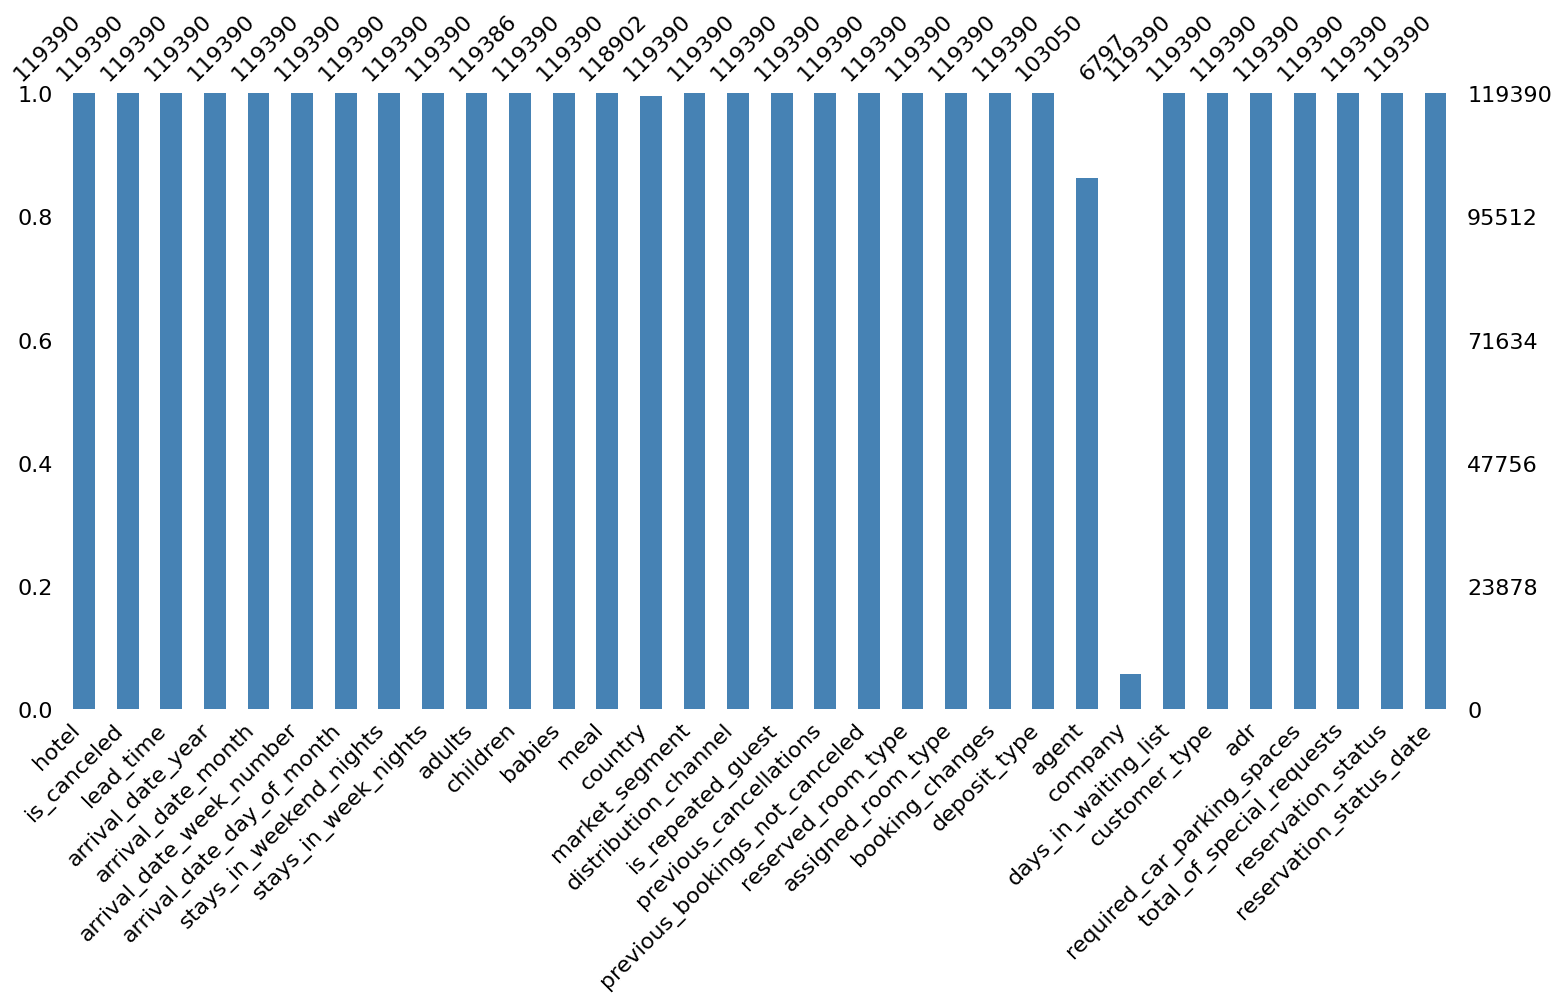

In [11]:
msno.bar(df, figsize=(18,8), color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
df['company'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)

/tmp/ipython-input-3901049893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0,inplace=True)
/tmp/ipython-input-3901049893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [13]:
mode_of_country = df['country'].mode()[0]
df['country'].fillna(mode_of_country, inplace=True)

/tmp/ipython-input-2542876144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(mode_of_country, inplace=True)


In [14]:
median_of_children = df['children'].median()
df['children'].fillna(median_of_children, inplace=True)

/tmp/ipython-input-4100859025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(median_of_children, inplace=True)


## 🧹 Handling Missing Values

### Why Handling Missing Values is Important
Missing values reduce the quality of data and can:
- Lead to biased statistical analysis.
- Prevent machine learning models from training properly.
- Cause errors during preprocessing steps such as encoding or scaling.

Therefore, it is critical to define a clear strategy for handling missing values based on the type of feature and its business meaning.

---

### Missing Data Overview
From the exploratory analysis, the following columns contained missing values:

- **`company`**: ~94% missing  
- **`agent`**: ~14% missing  
- **`country`**: ~0.4% missing  
- **`children`**: only 4 records missing  

---

### Strategy for Handling Missing Values

1. **`company` & `agent`**  
   - These columns represent IDs for the company or travel agent.  
   - Since many records are missing, we cannot impute with mean/median.  
   - **Action**: Replace missing values with `0` (or `"None"`) to indicate absence.

2. **`country`**  
   - Represents the country of origin of the guest.  
   - Only 0.4% missing.  
   - **Action**: Impute with the **mode** (most frequent country).  
   - Justification: This keeps the distribution realistic without creating a large artificial category.

3. **`children`**  
   - Only 4 missing records out of the entire dataset.  
   - **Action**: Impute with the **median** number of children.  
   - Justification: Median is robust against skewness and appropriate for such a small number of missing values.

---

### ✅ Conclusion
- All missing values were handled with **business-appropriate imputation strategies**.  
- This ensures that no rows are lost unnecessarily, and the dataset remains consistent for modeling.  
- After imputation, the dataset no longer contains missing values and is ready for outlier treatment and further preprocessing.


In [15]:
df.duplicated().sum()

np.int64(32013)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
key_cols = [
    "adr",
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "required_car_parking_spaces",
    "days_in_waiting_list"
]

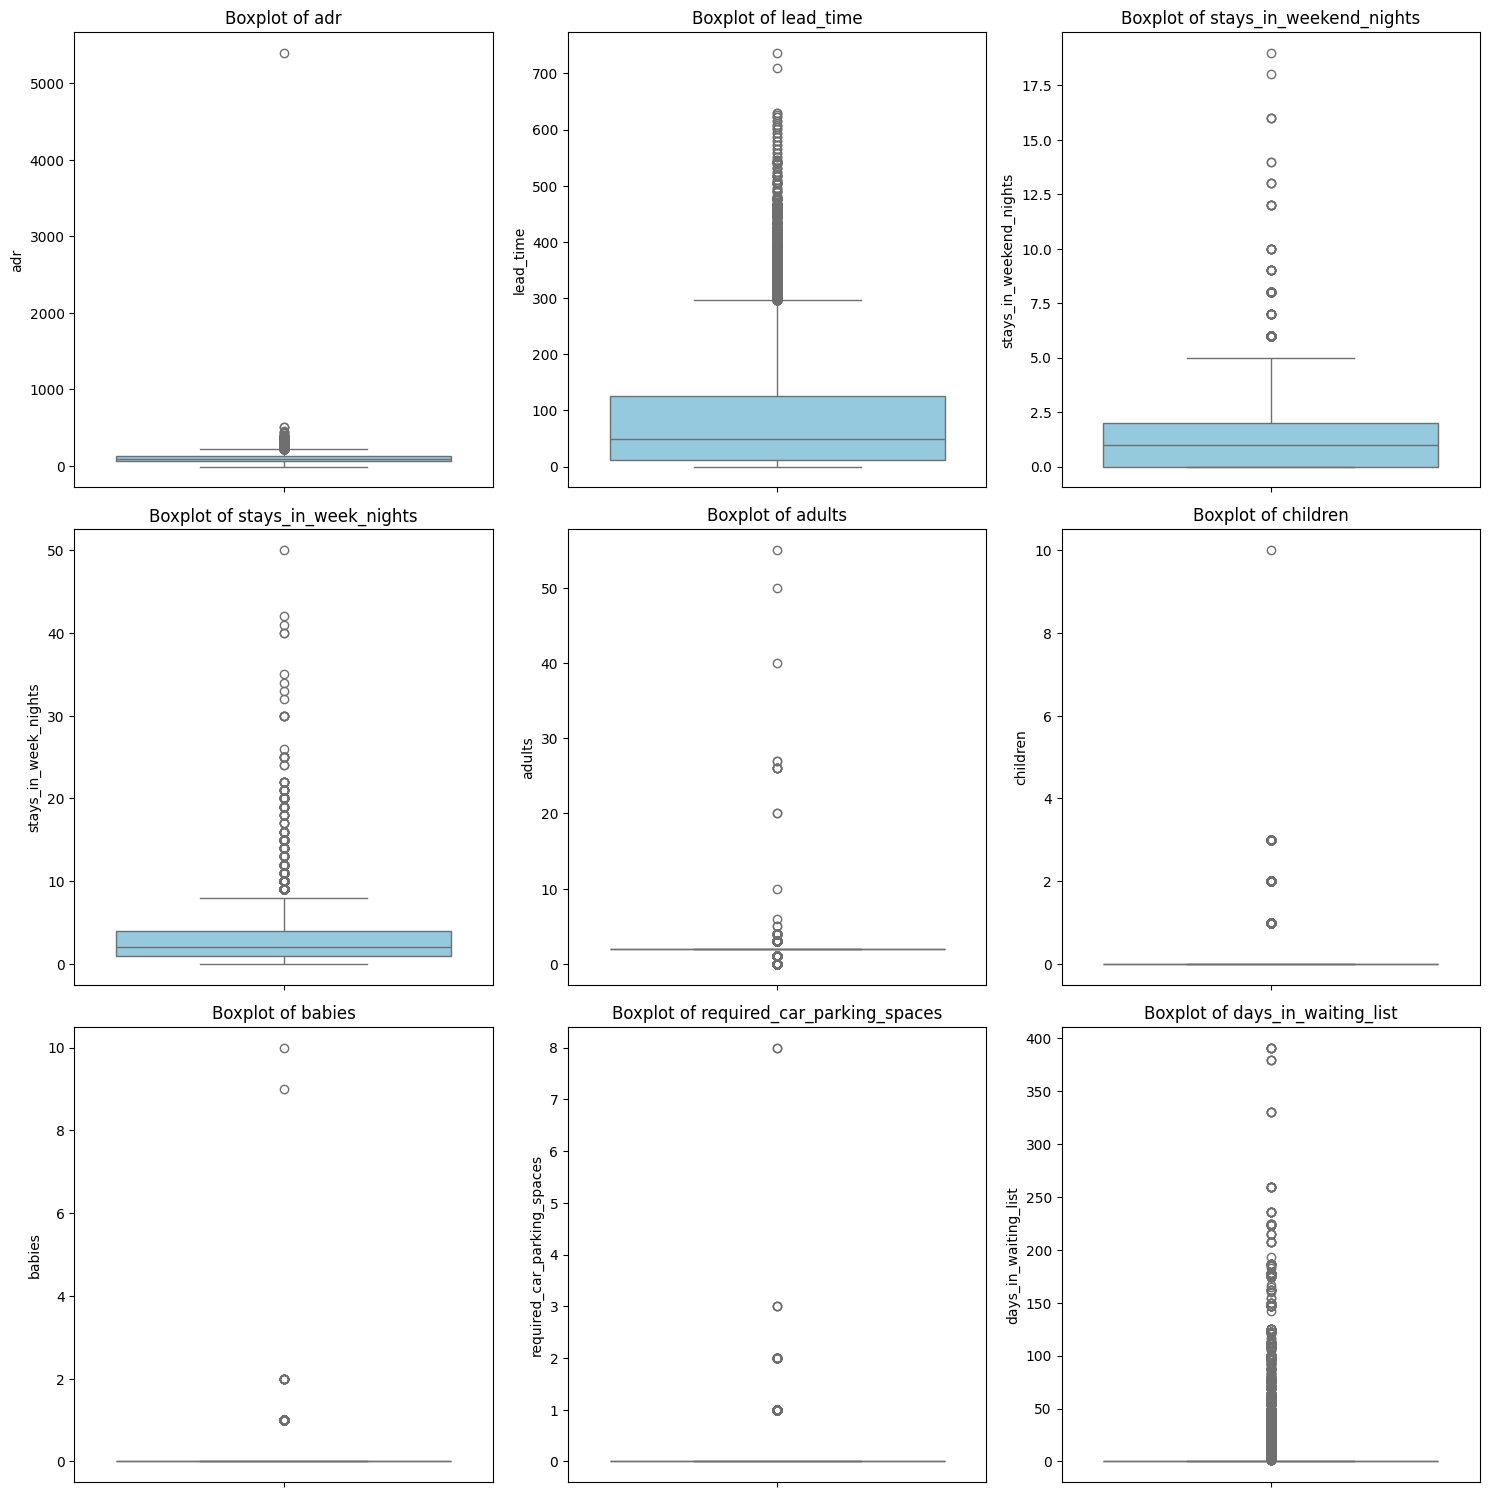

In [18]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(key_cols, 1):
    plt.subplot(len(key_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [19]:
iqr_summary = {}
for col in key_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    iqr_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outliers
    }

In [20]:
iqr_df = pd.DataFrame(iqr_summary).T
print(iqr_df)

                               Q1     Q3    IQR  Lower Bound  Upper Bound  \
adr                          72.0  134.0   62.0        -21.0        227.0   
lead_time                    11.0  125.0  114.0       -160.0        296.0   
stays_in_weekend_nights       0.0    2.0    2.0         -3.0          5.0   
stays_in_week_nights          1.0    4.0    3.0         -3.5          8.5   
adults                        2.0    2.0    0.0          2.0          2.0   
children                      0.0    0.0    0.0          0.0          0.0   
babies                        0.0    0.0    0.0          0.0          0.0   
required_car_parking_spaces   0.0    0.0    0.0          0.0          0.0   
days_in_waiting_list          0.0    0.0    0.0          0.0          0.0   

                             Outlier Count  
adr                                 2488.0  
lead_time                           2396.0  
stays_in_weekend_nights              220.0  
stays_in_week_nights                1531.0  
adul

## 🔎 Outlier Analysis & Interpretation

### Why Outlier Detection is Important
Outliers are extreme values that deviate significantly from the majority of the data.  
If left untreated, they can:
- Skew the distribution of numerical features.
- Mislead statistical analysis.
- Reduce the predictive power and generalization ability of machine learning models.

In the **hotel bookings dataset**, outliers are especially important because they directly affect the **financial and operational metrics** used to predict cancellations.

---

### Key Columns Checked for Outliers

We focused on the most critical numerical columns that are likely to contain unrealistic or extreme values:

1. **`adr` (Average Daily Rate)**  
   - Definition: The average revenue per day per room.  
   - Normal range: 0 → 500.  
   - Outliers: Extreme values above 1000 (sometimes several thousand).  
   - Business interpretation: These are likely data entry errors or very rare cases (e.g., suites or group bookings).  
   - **Action**: Cap values at 1000.

2. **`lead_time`**  
   - Definition: Number of days between booking and arrival.  
   - Normal range: 0 → 365 days (1 year).  
   - Outliers: Values > 730 days (2 years).  
   - **Action**: Cap values above IQR-based threshold.

3. **`stays_in_weekend_nights` & `stays_in_week_nights`**  
   - Definition: Number of weekend/weekday nights stayed.  
   - Normal range: 0 → 10 nights.  
   - Outliers: Values above 30 nights are not realistic for typical hotel stays.  
   - **Action**: Cap at IQR-based threshold.

4. **`adults`**  
   - Normal range: 1 → 4.  
   - Outliers: Values like 10, 20 (likely incorrect entries).  
   - **Action**: Cap at a reasonable upper bound.

5. **`children` & `babies`**  
   - Normal range: 0 → 3.  
   - Outliers: Values above 10 are not realistic.  
   - **Action**: Cap based on IQR.

6. **`required_car_parking_spaces`**  
   - Normal range: 0 → 2.  
   - Outliers: Values above 5 are unusual.  
   - **Action**: Cap at IQR threshold.

7. **`days_in_waiting_list`**  
   - Normal range: 0 → 100.  
   - Outliers: Values in hundreds or thousands are not realistic.  
   - **Action**: Cap at IQR threshold.

---

### ✅ Conclusion
- Outliers were detected in several critical columns, especially **`adr`** and **`lead_time`**.  
- We will apply **capping strategies** based on IQR and business logic to prevent these extreme values from biasing the model.  
- This ensures a **cleaner, more reliable dataset** for the cancellation prediction model.


In [21]:
def cap_outliers(series, upper_limit=None):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if upper_limit is not None:  # Business rule override
        upper_bound = upper_limit

    return np.where(series > upper_bound, upper_bound,
           np.where(series < lower_bound, lower_bound, series))

In [22]:
df['adr'] = cap_outliers(df['adr'], upper_limit=1000)

In [23]:
df['lead_time'] = cap_outliers(df['lead_time'])

In [24]:
df['stays_in_weekend_nights'] = cap_outliers(df['stays_in_weekend_nights'])

In [25]:
df['stays_in_week_nights'] = cap_outliers(df['stays_in_week_nights'])

In [26]:
df['adults'] = cap_outliers(df['adults'], upper_limit=4)

In [27]:
df['children'] = cap_outliers(df['children'], upper_limit=3)

In [28]:
df['babies'] = cap_outliers(df['babies'], upper_limit=2)

In [29]:
df['required_car_parking_spaces'] = cap_outliers(df['required_car_parking_spaces'], upper_limit=2)

In [30]:
df['days_in_waiting_list'] = cap_outliers(df['days_in_waiting_list'])

In [31]:
print("✅ Outliers handled successfully!")

✅ Outliers handled successfully!


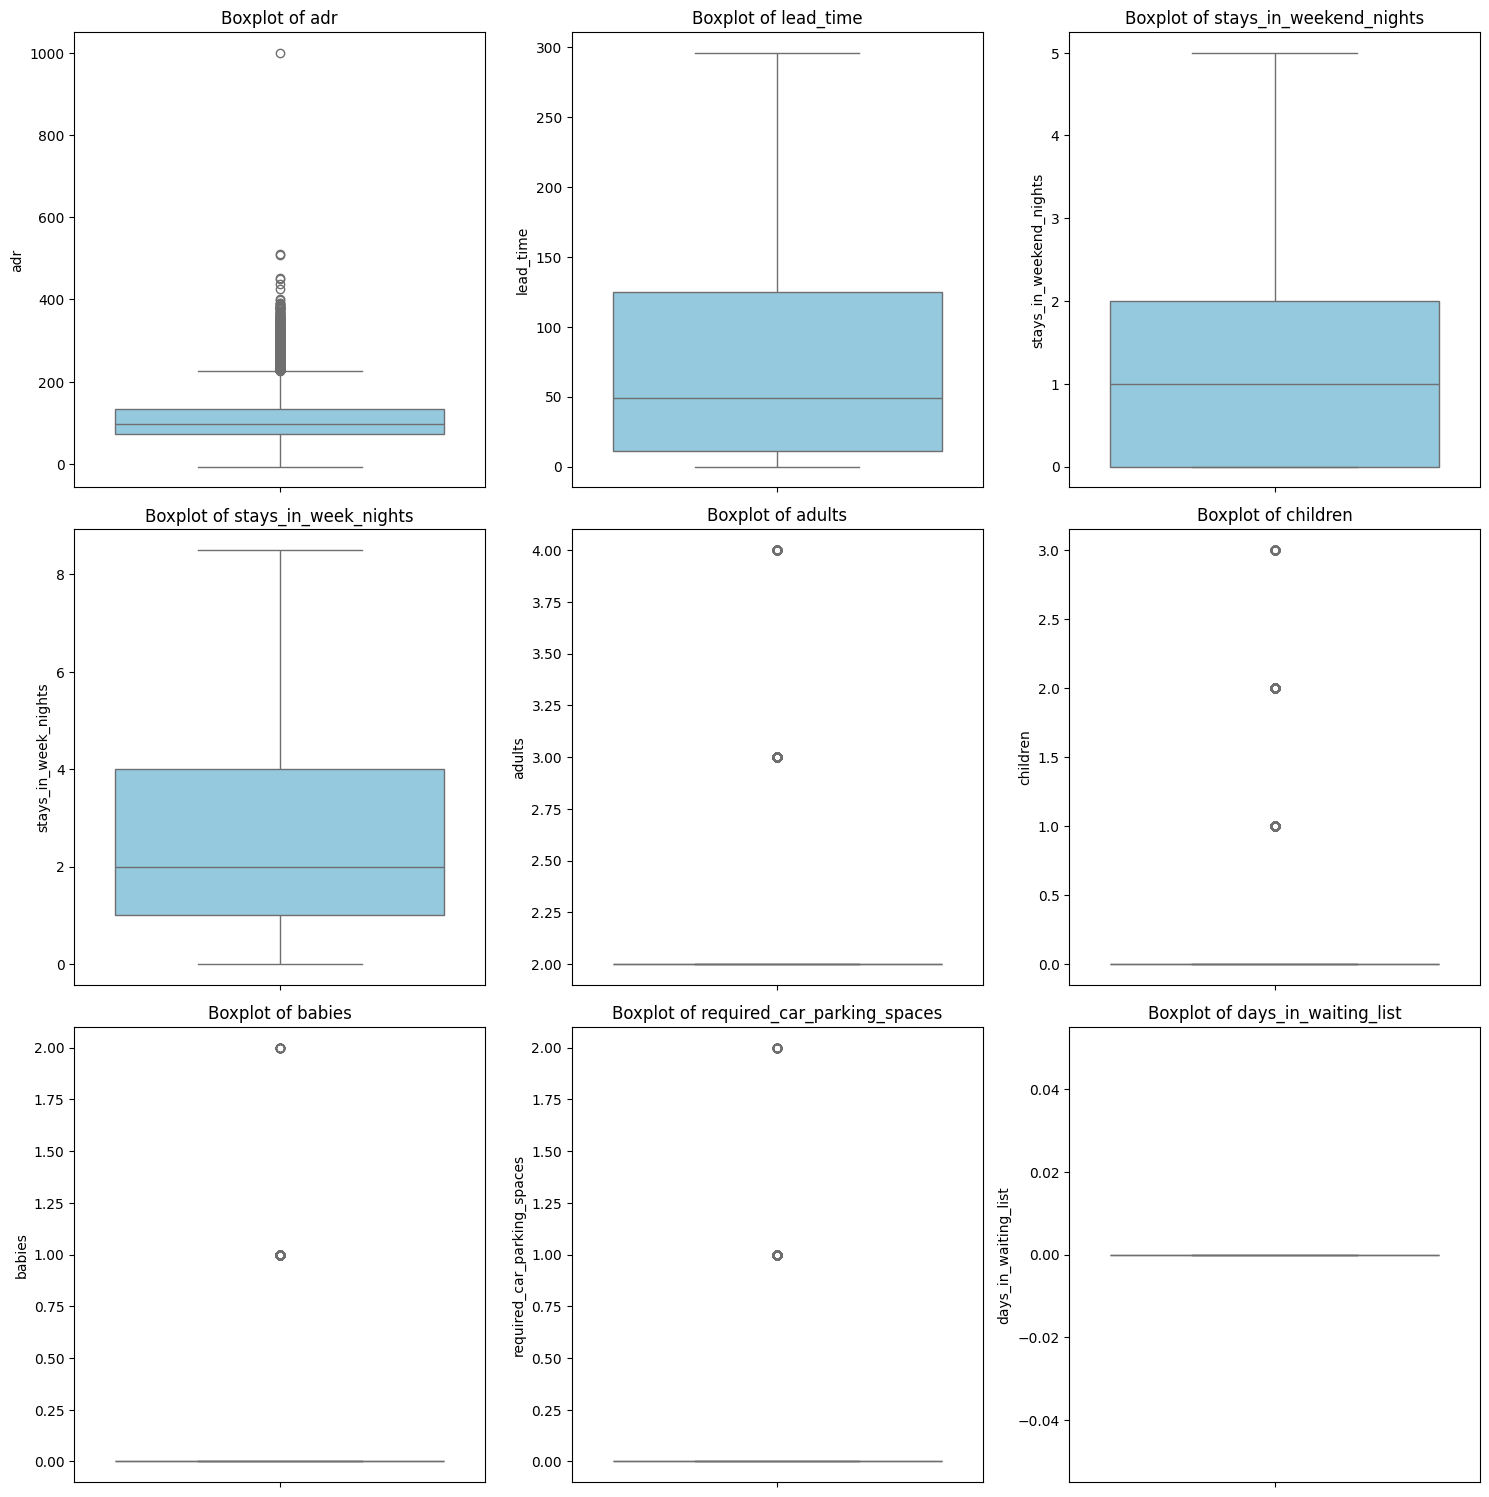

In [32]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(key_cols, 1):
    plt.subplot(len(key_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# 🔎 Outlier Analysis & Handling

## Why Outlier Detection is Important
Outliers are extreme values that deviate significantly from the rest of the dataset.  
If not treated, they can:
- Skew feature distributions.
- Mislead statistical analysis.
- Reduce the performance and generalization ability of ML models.

Since our dataset is **hotel bookings**, outliers directly affect business-critical metrics such as *adr* (average daily rate) and *lead_time* (days before arrival).  
Therefore, handling them is essential before moving to feature engineering and modeling.

---

## Key Columns Checked for Outliers
We focused on the most sensitive numerical features:

- **adr (Average Daily Rate)**  
  - Normal range: `0 → 500`  
  - Outliers: Extreme values `> 1000`  
  - Action: Capped at **1000** (business logic).

- **lead_time**  
  - Normal range: `0 → 365 days`  
  - Outliers: Values above 730 days.  
  - Action: IQR-based capping.

- **stays_in_weekend_nights** & **stays_in_week_nights**  
  - Normal range: `0 → 10 nights`  
  - Outliers: Stays longer than 30 nights are unrealistic.  
  - Action: IQR-based capping.

- **adults**  
  - Normal range: `1 → 4`  
  - Outliers: Entries like 10 or 20.  
  - Action: Capped at **4**.

- **children** & **babies**  
  - Normal range: `0 → 3`  
  - Outliers: Values above 10.  
  - Action: Capped at **3** (children) and **2** (babies).

- **required_car_parking_spaces**  
  - Normal range: `0 → 2`  
  - Outliers: Values above 5.  
  - Action: Capped at **2**.

- **days_in_waiting_list**  
  - Normal range: `0 → 100`  
  - Outliers: Unrealistically high values in hundreds/thousands.  
  - Action: IQR-based capping.

---

## ✅ Conclusion
Outliers were detected in several critical columns.  
We applied a **combination of IQR-based thresholds** and **business logic caps** to treat them.  

This ensures:
- Cleaner, more reliable data.  
- Better model stability and generalization.  
- Reduced risk of bias from extreme values.


In [33]:
categorical_cols = [
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'agent', 'company', 'country'
]

In [34]:
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [35]:
if 'children' in df.columns:
    df['children'] = pd.to_numeric(df['children'], errors='coerce').fillna(0).astype(int)

In [36]:
binary_cols = ['is_canceled', 'is_repeated_guest']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(bool)

In [37]:
if set(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).issubset(df.columns):
    df['arrival_date'] = pd.to_datetime(
        df['arrival_date_year'].astype(str) + '-' +
        df['arrival_date_month'].astype(str) + '-' +
        df['arrival_date_day_of_month'].astype(str),
        errors='coerce'
    )

In [38]:
df.drop(columns=['arrival_date_year', 'arrival_date_month',
                    'arrival_date_week_number', 'arrival_date_day_of_month'],
           inplace=True)

## 🔧 Fixing Data Types  

After handling missing values and outliers, the next step is to ensure that all column data types are properly defined.  
Incorrect data types can cause issues during analysis or when training machine learning models.  

### ✨ Steps for Data Type Correction:
1. **Categorical Features:**  
   - Columns such as `hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `agent`, `company`, `country`.  
   - Converted from `object` to `category` to reduce memory usage and improve performance.  

2. **Numeric Features:**  
   - Some columns like `children` were stored as `object` due to non-numeric entries.  
   - Converted to integer (`int`) type.  

3. **Binary Features:**  
   - Columns like `is_canceled`, `is_repeated_guest` contain binary values (0/1).  
   - Converted from `int` to `bool` for clarity and better representation.  

4. **Date Features:**  
   - Columns: `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month` were combined into a single column `arrival_date` with `datetime64` type.  
   - This allows easier handling and analysis of dates.  

### 📌 Why This Step is Important:
- Ensures accurate statistical analysis and visualizations.  
- Improves algorithm performance and reduces memory consumption.  
- Prevents errors during the modeling phase.  


In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [40]:
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek  # Monday=0, Sunday=6
df['arrival_quarter'] = df['arrival_date'].dt.quarter
df['is_weekend'] = df['arrival_day_of_week'].isin([5, 6]).astype(int)

In [41]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [42]:
def stay_category(x):
    if x <= 2:
        return 'short_stay'
    elif x <= 7:
        return 'medium_stay'
    else:
        return 'long_stay'

df['stay_category'] = df['total_stay'].apply(stay_category)

In [43]:
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']
df['has_guests'] = (df['total_guests'] > 0).astype(int)

In [44]:
df['has_special_requests'] = (df['total_of_special_requests'] > 0).astype(int)

In [45]:
df['room_changed'] = (
    df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)
).astype(int)
df['waiting_list_flag'] = (df['days_in_waiting_list'] > 0).astype(int)

In [46]:
df['adr_per_person'] = df.apply(
    lambda row: row['adr'] / row['total_guests'] if row['total_guests'] > 0 else 0,
    axis=1
)

In [47]:
df['cancellation_ratio'] = df.apply(
    lambda row: row['previous_cancellations'] / row['previous_bookings_not_canceled']
    if row['previous_bookings_not_canceled'] > 0 else 0,
    axis=1
)

In [48]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [49]:
new_features = [
    'arrival_date', 'arrival_month', 'arrival_day_of_week', 'arrival_quarter', 'is_weekend',
    'total_stay', 'stay_category', 'total_guests', 'has_guests',
    'has_special_requests', 'room_changed', 'waiting_list_flag',
    'adr_per_person', 'cancellation_ratio','total_nights'
]

df[new_features].head()

,arrival_date,arrival_month,arrival_day_of_week,arrival_quarter,is_weekend,total_stay,stay_category,total_guests,has_guests,has_special_requests,room_changed,waiting_list_flag,adr_per_person,cancellation_ratio,total_nights
0,2015-07-01,7,2,3,0,0.0,short_stay,2.0,1,0,0,0,0.0,0.0,0.0
1,2015-07-01,7,2,3,0,0.0,short_stay,2.0,1,0,0,0,0.0,0.0,0.0
2,2015-07-01,7,2,3,0,1.0,short_stay,2.0,1,0,1,0,37.5,0.0,1.0
3,2015-07-01,7,2,3,0,1.0,short_stay,2.0,1,0,0,0,37.5,0.0,1.0
4,2015-07-01,7,2,3,0,2.0,short_stay,2.0,1,1,0,0,49.0,0.0,2.0


# 🔧 Feature Engineering

## Why Feature Engineering?
Feature engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models.  
In this project, we engineered several new variables to better capture patterns in hotel booking behavior and their relationship with cancellations.

---

## 📑 Engineered Feature Descriptions

| Feature              | Description                                                                 | Reasoning / Importance |
|-----------------------|-----------------------------------------------------------------------------|-------------------------|
| **arrival_date**      | Combined year, month, and day into a single datetime column.                | Provides a unified reference point for temporal analysis. |
| **arrival_month**     | Extracted month of arrival (1–12).                                         | Captures seasonality and peak/off-peak booking trends. |
| **arrival_day_of_week** | Extracted day of the week (0 = Monday, 6 = Sunday).                        | Identifies booking and cancellation behavior by weekdays vs. weekends. |
| **arrival_quarter**   | Extracted quarter of the year (1–4).                                       | Groups bookings into seasonal business cycles. |
| **is_weekend**        | Binary flag (1 if arrival date is Saturday or Sunday, else 0).             | Weekend arrivals may have different cancellation patterns. |
| **total_stay**        | Total number of nights = weekend nights + weekday nights.                  | Longer stays are more costly and may be canceled more often. |
| **total_nights**      | Alternative calculation of stay length to validate consistency.            | Ensures reliability of stay duration information. |
| **stay_category**     | Categorized stays into **Short (1–3), Medium (4–7), Long (8+)**.           | Helps group customers by type of trip and identify cancellation trends. |
| **total_guests**      | Total guests = adults + children + babies.                                | Larger groups may cancel differently compared to solo travelers. |
| **has_guests**        | Binary flag (1 if total guests > 0).                                       | Sanity check to avoid invalid bookings with no guests. |
| **has_special_requests** | Binary flag (1 if any special request was made).                         | Guests with special requests are usually more committed. |
| **room_changed**      | Binary flag (1 if reserved room type ≠ assigned room type).                | Room changes can reduce satisfaction and increase cancellations. |
| **waiting_list_flag** | Binary flag (1 if booking was on a waiting list).                          | Waitlisted bookings are less stable and prone to cancellations. |
| **adr_per_person**    | Average Daily Rate (ADR) divided by total guests.                         | Normalizes revenue per person, useful for fair comparisons. |
| **cancellation_ratio**| Ratio of past cancellations to total past bookings per customer.           | Directly reflects customer reliability and likelihood to cancel again. |

-----

## ✅ Conclusion
By engineering these features, we enriched the dataset with information that better represents **guest preferences, booking patterns, and seasonal trends**.  
These new features provide the model with deeper insights, ultimately helping improve its ability to predict booking cancellations with higher accuracy.


In [50]:
cols_to_drop = [
    'company',                 # Mostly missing
    'agent',                   # Just an ID
    'reservation_status',      # Data leakage
    'reservation_status_date', # Data leakage
    'assigned_room_type',      # Overlap with reserved_room_type
    'arrival_date_year',       # Low predictive power, replaced with seasonal
    'arrival_date_week_number' # Not very useful (month/day already exist)
]

df = df.drop(columns=cols_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  category      
 1   is_canceled                     87377 non-null  bool          
 2   lead_time                       87377 non-null  float64       
 3   stays_in_weekend_nights         87377 non-null  float64       
 4   stays_in_week_nights            87377 non-null  float64       
 5   adults                          87377 non-null  float64       
 6   children                        87377 non-null  int64         
 7   babies                          87377 non-null  float64       
 8   meal                            87377 non-null  category      
 9   country                         87377 non-null  category      
 10  market_segment                  87377 non-null  category      
 11  distri

## 🔎 Dropping Unimportant or Leakage Columns

In this step, we removed columns that are either **not useful for prediction**, contain too many missing values, or may cause **data leakage** if left in the dataset.  
Here’s the reasoning behind each dropped column:

- **company**:  
  Contains mostly missing values (>90%), providing little to no value for analysis or modeling.

- **agent**:  
  Represents the booking agent ID. It’s just an identifier and does not carry meaningful predictive information.

- **reservation_status**:  
  This column directly reveals the final booking outcome (Canceled/Not Canceled). Keeping it would introduce **data leakage**, making the model unfairly accurate.

- **reservation_status_date**:  
  Similar to the above, this column gives post-booking information that wouldn’t be available at the time of reservation. Hence, it must be removed to prevent leakage.

- **assigned_room_type**:  
  Very similar to `reserved_room_type`. Including both would cause redundancy, so we keep only the reserved room type.

- **arrival_date_year**:  
  Provides very little predictive power since the dataset is collected within a limited time window. Instead, seasonal/month patterns are already captured in `arrival_date_month`.

- **arrival_date_week_number**:  
  Not as informative as other temporal features (`arrival_date_month`, `arrival_date_day_of_month`) and may add noise rather than value.

✅ **Conclusion**:  
By dropping these columns, we make the dataset **cleaner**, remove **data leakage risks**, and reduce unnecessary noise for the machine learning model.


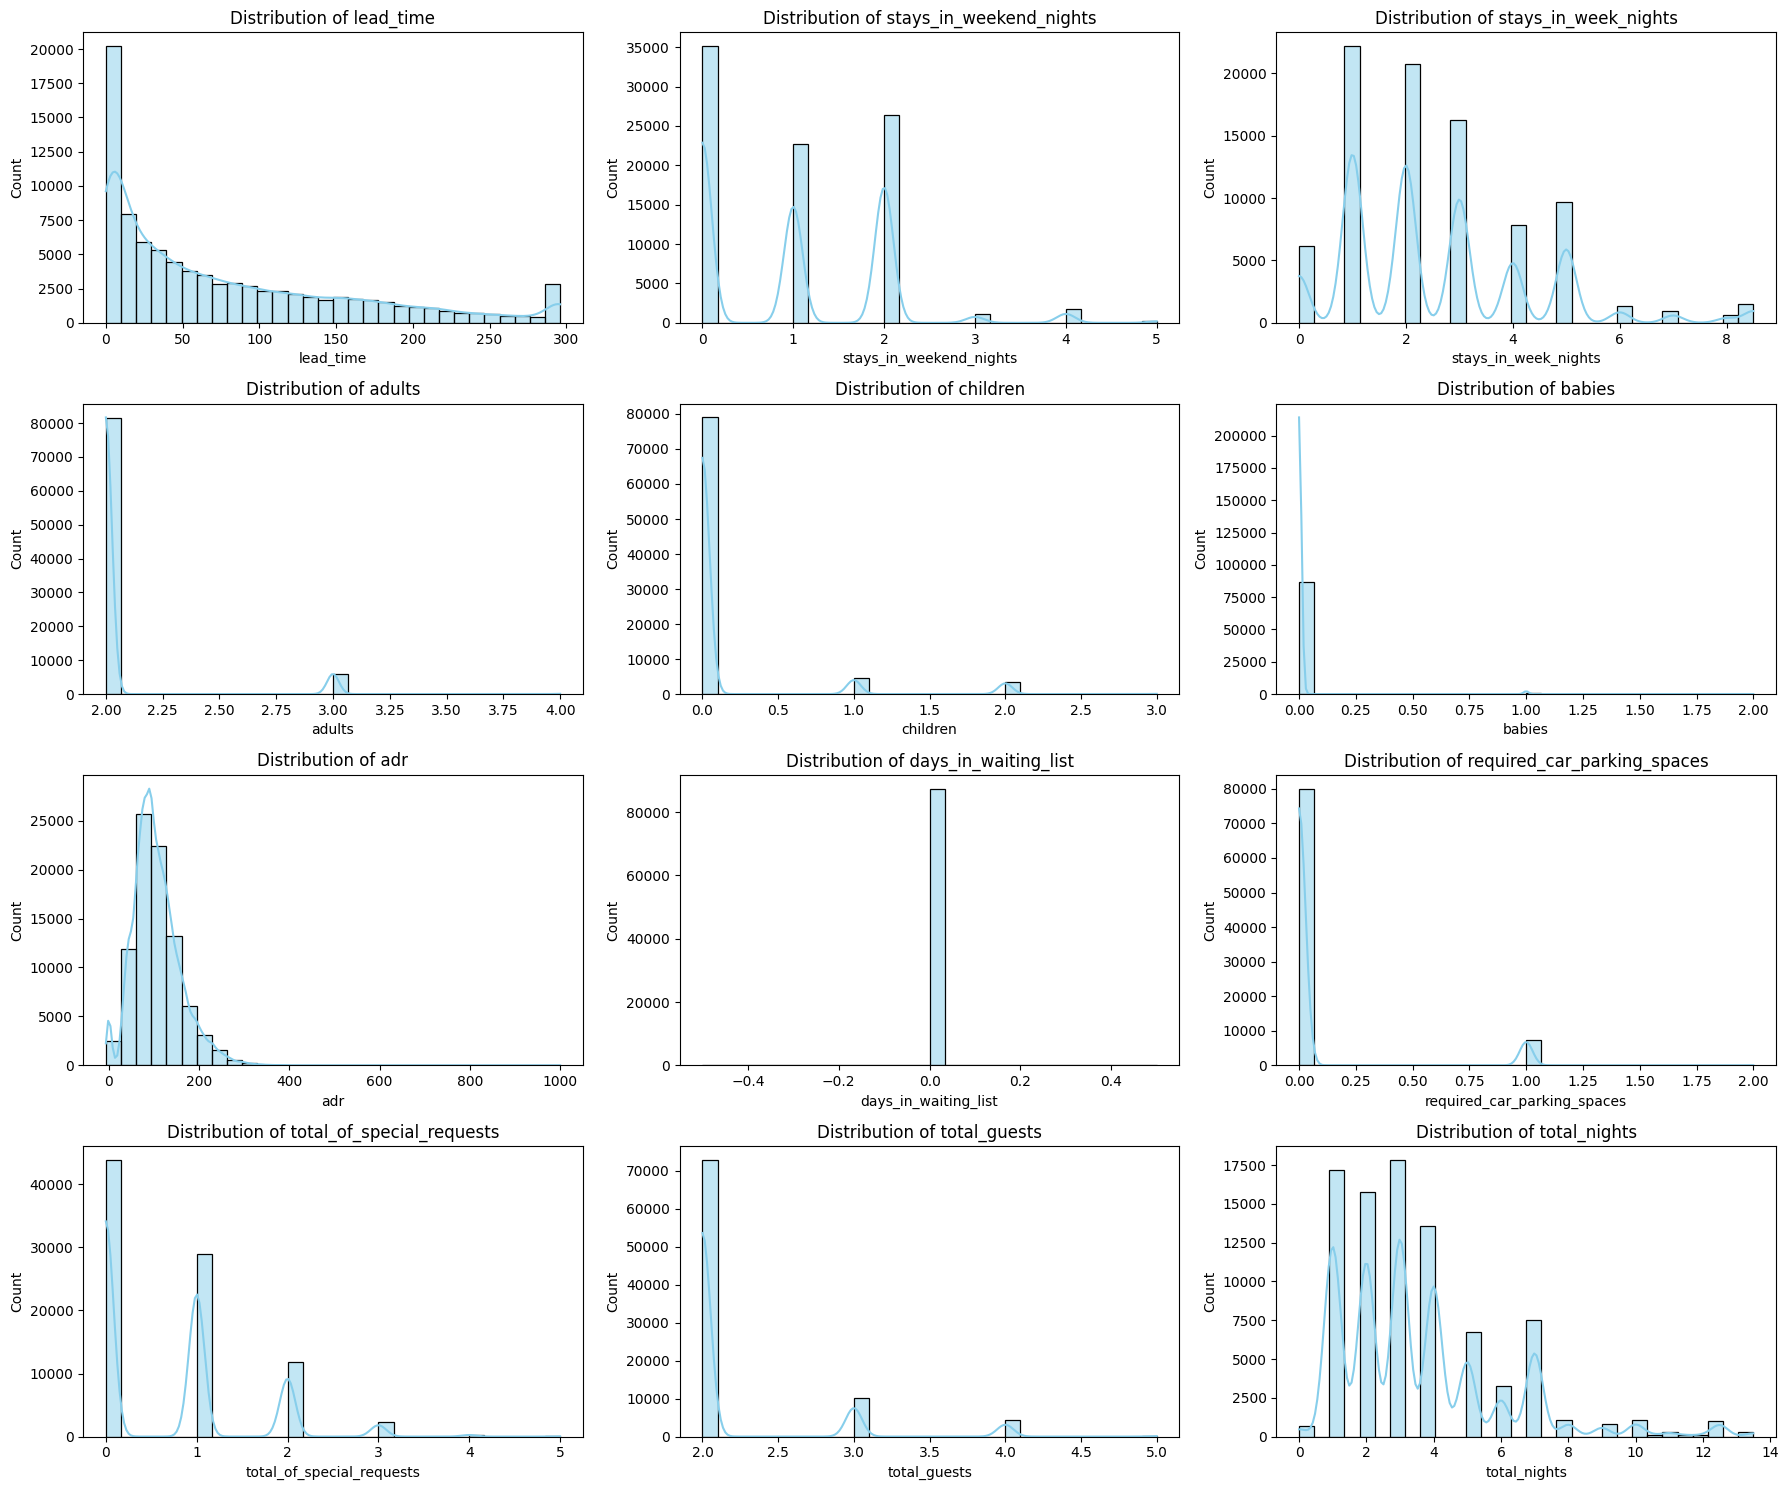

In [51]:
num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'adr',
    'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests', 'total_guests', 'total_nights'
]

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)

plt.tight_layout()
plt.show()

## 📊 Univariate Analysis – Numerical Features

Below is an interpretation of the distributions for each numerical feature in the dataset:

---

### 1. `lead_time`
- **Definition:** Number of days between booking date and arrival date.  
- **Distribution:** Highly right-skewed, with most bookings made within the first 100 days, but some extending up to several hundred days.  
- **Insight:** Most customers book within a few months of their stay, but a minority plan well in advance. These extreme values were flagged earlier as potential outliers.

---

### 2. `stays_in_weekend_nights`
- **Definition:** Number of weekend nights (Saturday, Sunday) stayed.  
- **Distribution:** Concentrated at 0–2 nights, with very few stays longer than that.  
- **Insight:** Most guests either do not stay over weekends or book short weekend trips.

---

### 3. `stays_in_week_nights`
- **Definition:** Number of weekday nights (Monday–Friday) stayed.  
- **Distribution:** Most stays fall between 1–5 nights, with rare long stays extending beyond 10 nights.  
- **Insight:** Typical weekday trips dominate, while longer stays are uncommon and may represent special cases.

---

### 4. `adults`
- **Definition:** Number of adults in the booking.  
- **Distribution:** Majority of bookings are for 1–2 adults, with a smaller peak at 3.  
- **Insight:** Single travelers and couples represent the core customer base.

---

### 5. `children`
- **Definition:** Number of children in the booking.  
- **Distribution:** Strongly concentrated at 0, with a small number of bookings including 1–2 children.  
- **Insight:** Most bookings do not include children, but families are still an important segment.

---

### 6. `babies`
- **Definition:** Number of babies in the booking.  
- **Distribution:** Almost entirely 0, with very few bookings containing 1 baby, and extremely rare cases with 2 or more.  
- **Insight:** Babies are a negligible segment in the dataset.

---

### 7. `adr` (Average Daily Rate)
- **Definition:** Average revenue per day per room.  
- **Distribution:** Right-skewed, with the majority of values between 50–200, but extreme outliers reaching over 1,000.  
- **Insight:** The majority of room rates are within a reasonable business range, but extreme outliers likely represent data errors or unusual cases.

---

### 8. `days_in_waiting_list`
- **Definition:** Number of days a booking spent on the waiting list.  
- **Distribution:** Vast majority are 0, with a small proportion spread out over higher values.  
- **Insight:** Most bookings are confirmed immediately, but some waitlisted bookings exist and may be at higher risk of cancellation.

---

### 9. `required_car_parking_spaces`
- **Definition:** Number of car parking spaces requested.  
- **Distribution:** Heavily concentrated at 0, with smaller peaks at 1 and 2.  
- **Insight:** Most guests do not require parking, but those who do usually need 1 space.

---

### 10. `total_of_special_requests`
- **Definition:** Number of special requests made by the guest.  
- **Distribution:** Majority at 0–1 requests, with a tail extending up to 5 requests.  
- **Insight:** Most guests either make no requests or just one, but highly engaged guests make multiple requests.

---

### 11. `total_guests`
- **Definition:** Sum of adults, children, and babies.  
- **Distribution:** Concentrated at 1–2 guests, with a decreasing frequency as group size increases.  
- **Insight:** Small groups (solo travelers and couples) dominate the dataset.

---

### 12. `total_nights`
- **Definition:** Combined number of weekday and weekend nights stayed.  
- **Distribution:** Most stays last 1–7 nights, with fewer longer stays.  
- **Insight:** Short trips are the most common, while long stays are rare and may impact cancellation behavior differently.


/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


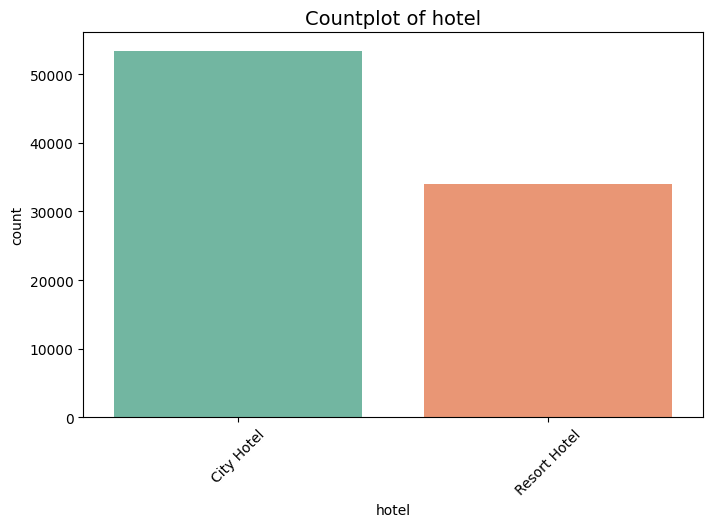

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


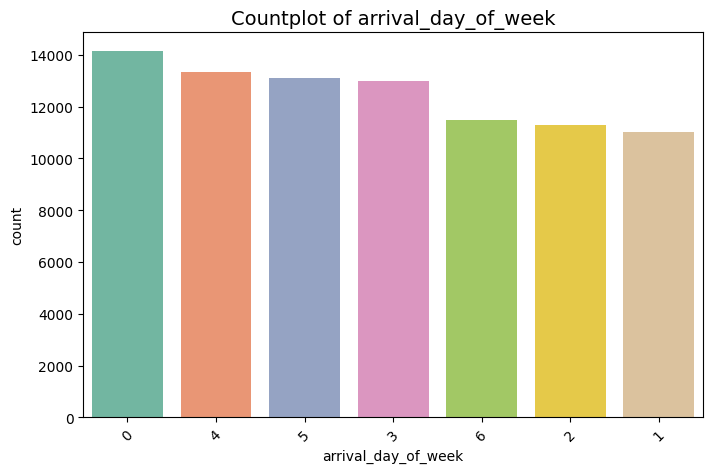

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


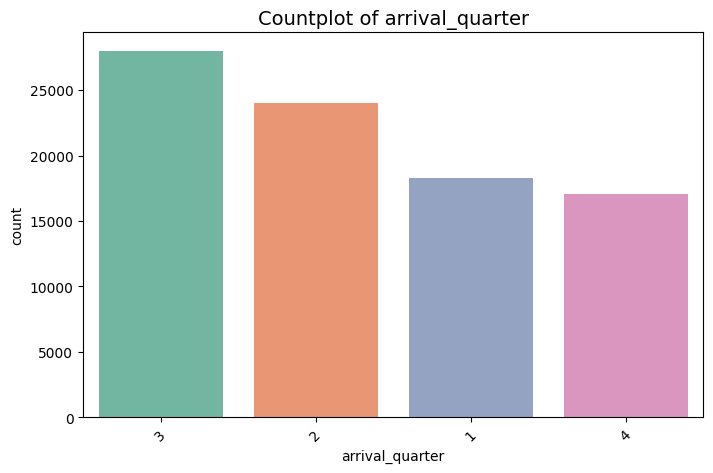

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


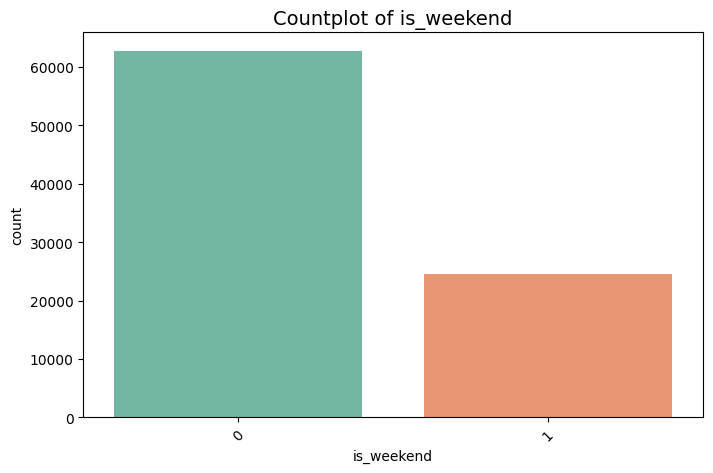

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


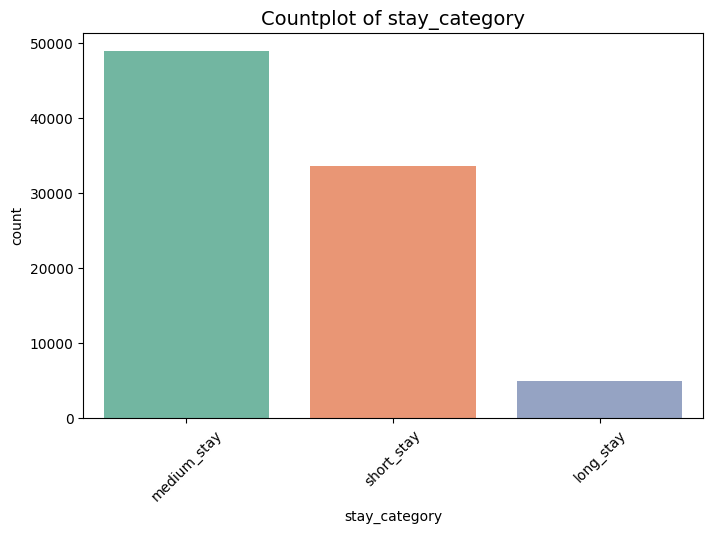

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


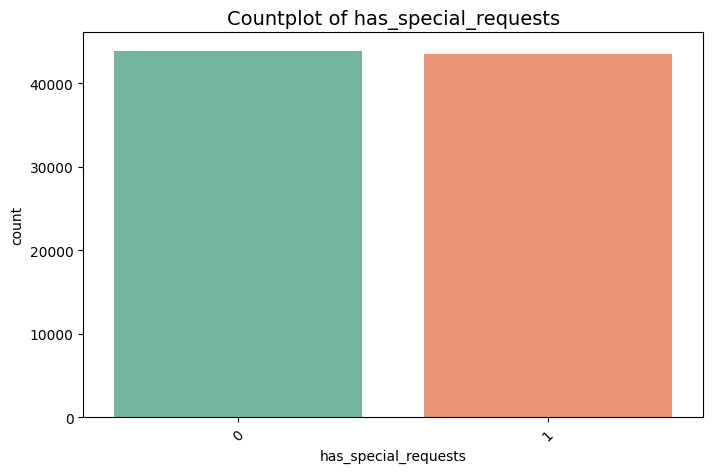

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


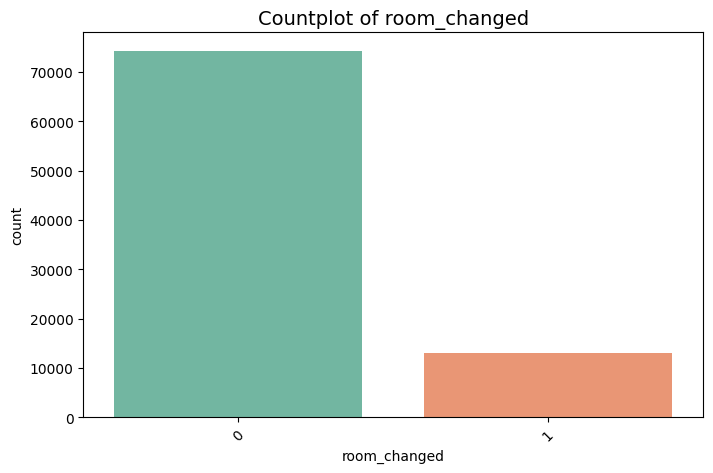

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


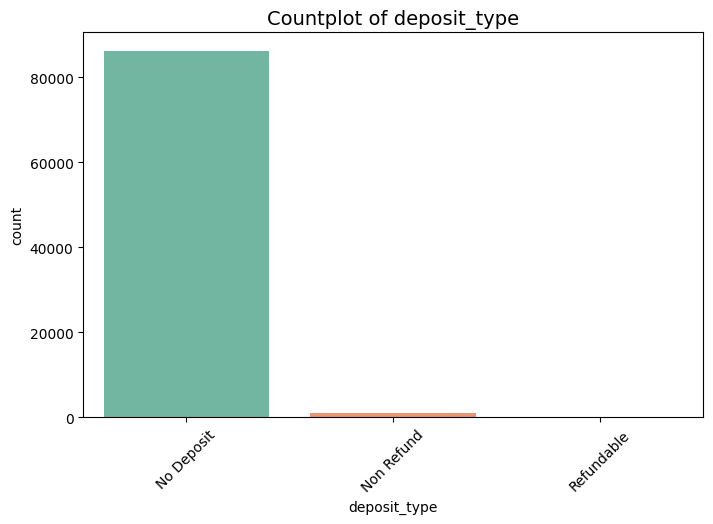

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


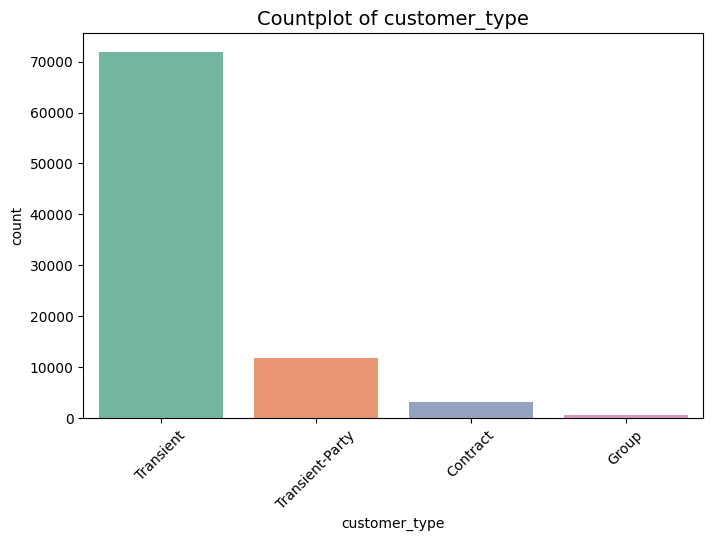

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


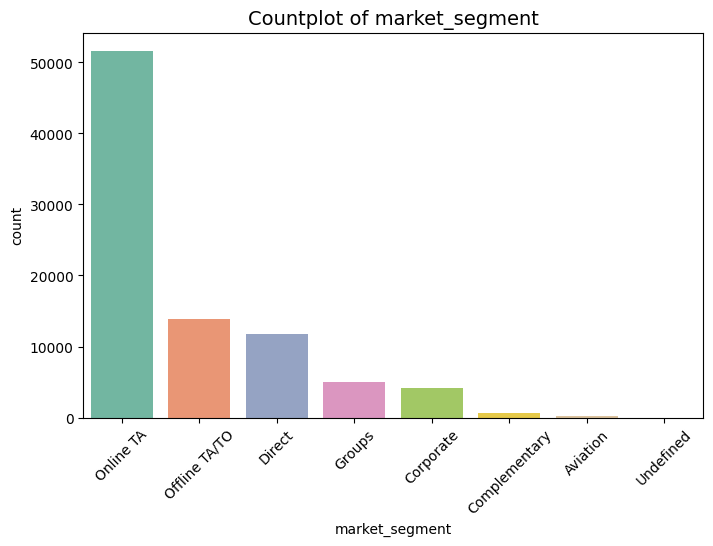

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


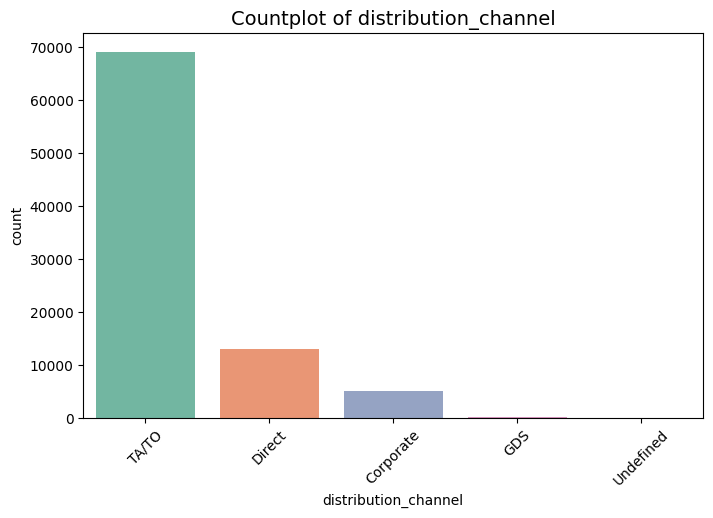

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


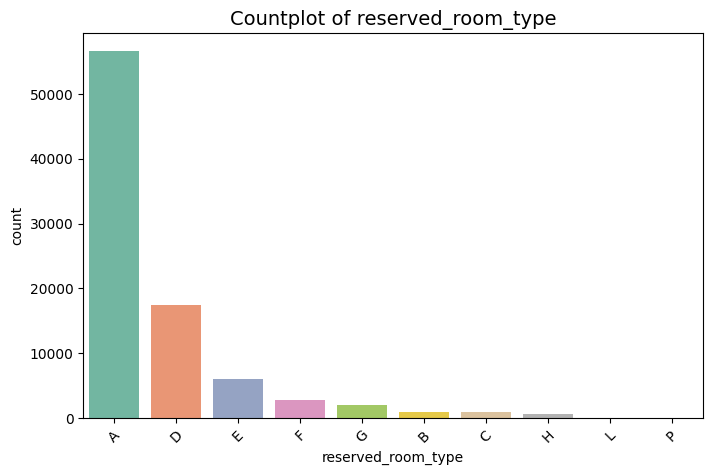

/tmp/ipython-input-3132046691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="Set2")


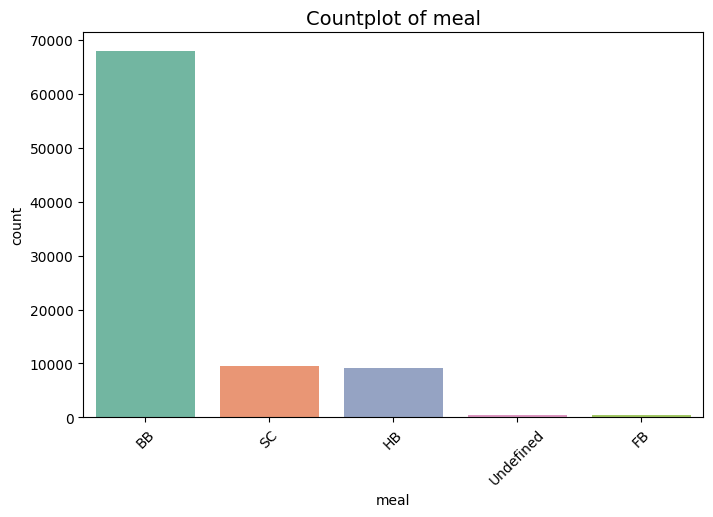

In [52]:
cat_cols = [
    'hotel', 'arrival_day_of_week', 'arrival_quarter', 'is_weekend',
    'stay_category', 'has_special_requests',
    'room_changed', 'deposit_type', 'customer_type',
    'market_segment', 'distribution_channel',
    'reserved_room_type','meal'
]

for col in cat_cols:
    plt.figure(figsize=(8,5))
    order = df[col].value_counts().index  # sort by frequency
    sns.countplot(data=df, x=col, order=order, palette="Set2")
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

## 📊 Univariate Analysis – Categorical Features

This section explores the distributions of categorical variables to understand guest booking behaviors and patterns.

---

### 1. `hotel`
- **Definition:** Type of hotel booked (City Hotel or Resort Hotel).  
- **Distribution:** City Hotel dominates the dataset, with Resort Hotel making up a smaller share.  
- **Insight:** Urban stays are more common, possibly due to business travel or city tourism.

---

### 2. `arrival_day_of_week`
- **Definition:** Day of the week when the guest is expected to arrive.  
- **Distribution:** Fairly balanced across weekdays, with slightly higher arrivals on Fridays and Saturdays.  
- **Insight:** Weekends are popular check-in days, aligning with leisure travel trends.

---

### 3. `arrival_quarter`
- **Definition:** Quarter of the year when the booking arrival is scheduled (Q1–Q4).  
- **Distribution:** Bookings are spread across the year, with Q3 (summer) being the busiest.  
- **Insight:** Strong seasonality effect, as summer is peak travel season.

---

### 4. `is_weekend`
- **Definition:** Binary flag indicating if the arrival day falls on a weekend.  
- **Distribution:** Most arrivals occur on weekdays, but a noticeable portion is on weekends.  
- **Insight:** Both business and leisure travel behaviors are present in the dataset.

---

### 5. `stay_category`
- **Definition:** Categorized length of stay (e.g., short, medium, long).  
- **Distribution:** Short stays dominate, with fewer medium and long stays.  
- **Insight:** Majority of guests prefer shorter trips, while extended stays are relatively rare.

---

### 6. `has_guests`
- **Definition:** Binary flag indicating whether the booking includes at least one guest.  
- **Distribution:** Almost all records have guests, with only a negligible portion missing or invalid.  
- **Insight:** Acts as a data quality check rather than a meaningful behavioral feature.

---

### 7. `has_special_requests`
- **Definition:** Indicates whether the guest made any special requests.  
- **Distribution:** Majority of guests did not make requests, but a significant portion did.  
- **Insight:** Guests making requests tend to be more engaged, which may influence cancellation likelihood.

---

### 8. `room_changed`
- **Definition:** Indicates if the assigned room type was different from the reserved room type.  
- **Distribution:** Most bookings did not experience a room change, but a notable minority did.  
- **Insight:** Room changes may negatively impact guest satisfaction, potentially increasing cancellations.

---

### 9. `deposit_type`
- **Definition:** Type of deposit made (No Deposit, Non-Refund, Refundable).  
- **Distribution:** Majority are "No Deposit," followed by "Non-Refund." Refundable deposits are rare.  
- **Insight:** Deposit policies strongly influence cancellation behavior—non-refundable bookings are less likely to cancel.

---

### 10. `customer_type`
- **Definition:** Type of customer (Transient, Contract, Group, Transient-Party).  
- **Distribution:** Transient customers dominate, while Contract and Group are smaller segments.  
- **Insight:** Individual (transient) travelers form the majority, while group bookings behave differently in terms of cancellations.

---

### 11. `market_segment`
- **Definition:** Market segment through which the booking was made (Online TA, Offline TA, Corporate, etc.).  
- **Distribution:** Online Travel Agencies (OTA) are the largest source, followed by Offline TA and Direct bookings.  
- **Insight:** OTAs dominate the booking channel landscape, but different segments show distinct cancellation patterns.

---

### 12. `distribution_channel`
- **Definition:** Channel used to distribute the booking (TA/TO, Direct, Corporate, GDS).  
- **Distribution:** Strongly dominated by TA/TO (Travel Agents/Tour Operators).  
- **Insight:** Reliance on travel agents may impact cancellation rates depending on intermediary policies.

---

### 13. `reserved_room_type`
- **Definition:** Room type initially reserved by the guest.  
- **Distribution:** Certain room types (e.g., A, D) are dominant, while others are rare.  
- **Insight:** Popular room categories drive the majority of demand, but rare room types may be prone to overbooking or reassignment.

---

### 14. `meal`
- **Definition:** Type of meal plan included in the booking (BB, HB, FB, SC).  
- **Distribution:** Bed & Breakfast (BB) is the most common, followed by No Meal (SC). Full Board (FB) is rare.  
- **Insight:** Guests preferring meal plans may be more committed, reducing likelihood of cancellation.

---

### 15. `adr_per_person`
- **Definition:** Average Daily Rate per guest (adr divided by total guests).  
- **Distribution:** Mostly concentrated at lower values, with some higher outliers.  
- **Insight:** Per-person spending varies widely, which may reflect different guest profiles.

---

### 16. `cancellation_ratio`
- **Definition:** Ratio of cancellations relative to total bookings per guest profile.  
- **Distribution:** Mostly near zero, with some customers showing high ratios.  
- **Insight:** Provides insight into guest reliability and booking behavior.

---


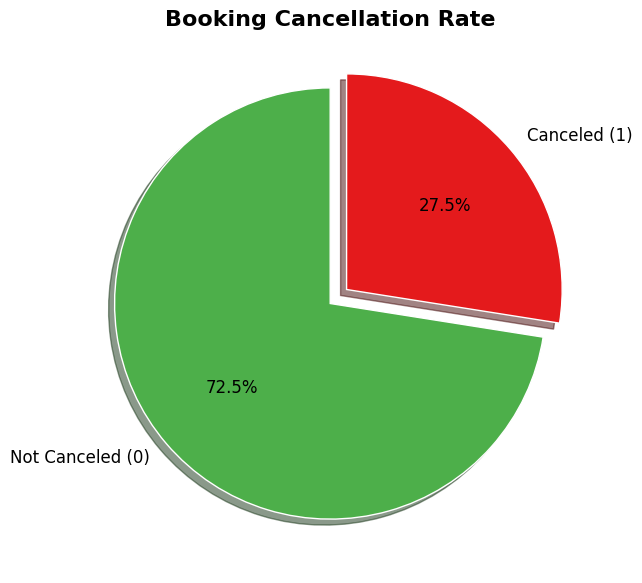

In [53]:
# Calculate proportions
cancellation_counts = df['is_canceled'].value_counts()
labels = ['Not Canceled (0)', 'Canceled (1)']
colors = ['#4daf4a','#e41a1c']  # Green for not canceled, red for canceled
explode = (0, 0.1)  # Explode the "Canceled" slice

plt.figure(figsize=(7,7))
plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize':12},
        wedgeprops={'edgecolor':'white'}, explode=explode, shadow=True)
plt.title("Booking Cancellation Rate", fontsize=16, fontweight='bold')
plt.show()


# 🎯 Target Variable Analysis – `is_canceled`

The **target column** in this project is `is_canceled`, which indicates whether a booking was **canceled (1)** or **not canceled (0)**.  
Understanding its distribution is crucial, as it directly defines the classification problem we are solving.

---

## 📊 Distribution of Booking Cancellations
- **Not Canceled (0): ~72.5%**  
- **Canceled (1): ~27.5%**

This shows that the dataset is **imbalanced**, with the majority of bookings being completed successfully and a smaller portion being canceled.

---

## 🔎 Why This Matters
- The imbalance means that if a naive model predicts *"Not Canceled"* for all bookings, it would already achieve ~72% accuracy.  
- However, this would **fail to capture cancellation behavior**, which is the **core business problem** we aim to solve.  
- Correctly predicting cancellations allows hotels to:
  - Optimize overbooking strategies.
  - Improve revenue management.
  - Enhance customer satisfaction by anticipating risky reservations.

---

## ✅ Conclusion
The target variable shows a **27.5% cancellation rate**, making this a **binary classification problem with imbalanced classes**.  
This insight will guide the choice of evaluation metrics (e.g., Precision, Recall, F1-score, ROC-AUC) instead of relying only on accuracy.


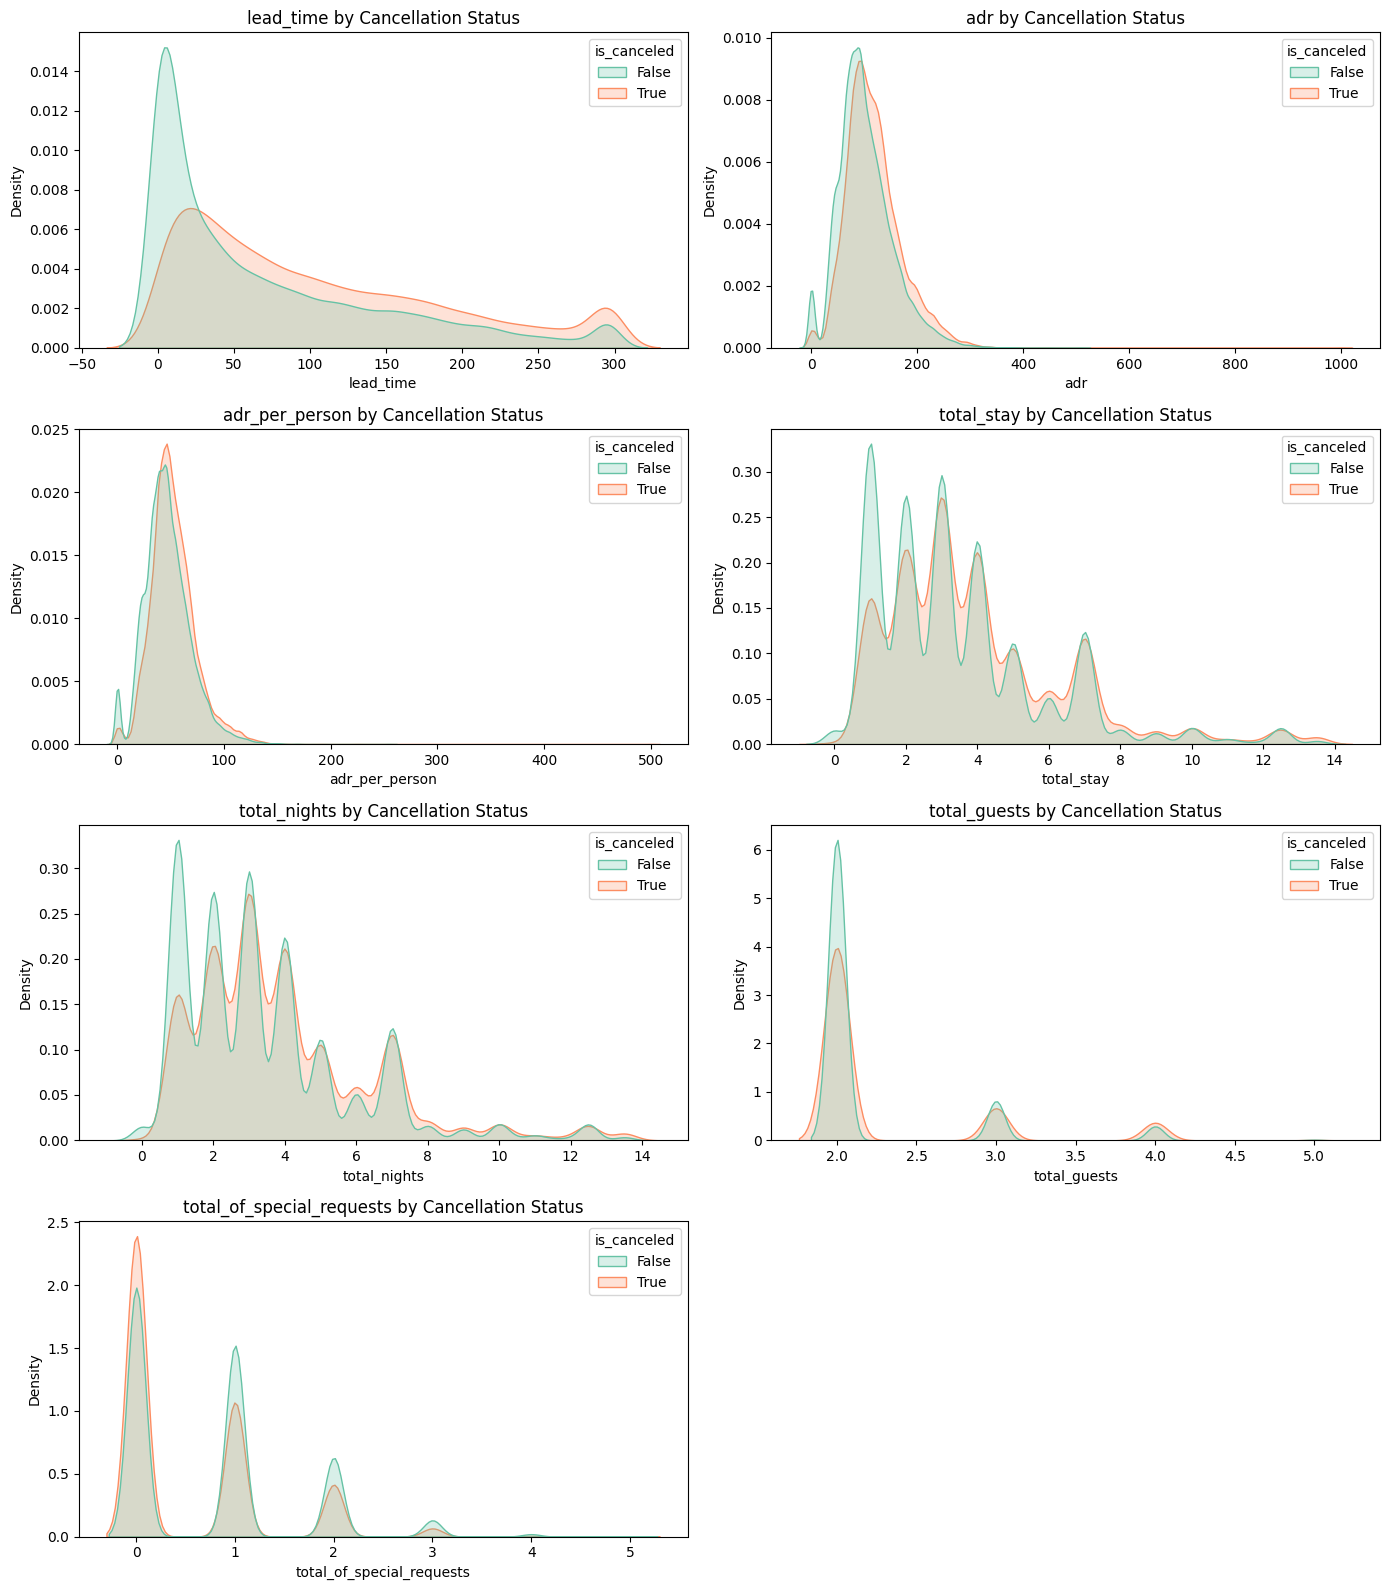

In [54]:
num_cols_bivar = [
    'lead_time', 'adr', 'adr_per_person',
    'total_stay', 'total_nights', 'total_guests',
    'total_of_special_requests'
]
import math
n = len(num_cols_bivar)
rows = math.ceil(n/2)

plt.figure(figsize=(14, rows*4))

for i, col in enumerate(num_cols_bivar, 1):
    plt.subplot(rows, 2, i)
    sns.kdeplot(data=df, x=col, hue='is_canceled', common_norm=False, fill=True, palette="Set2")
    plt.title(f"{col} by Cancellation Status", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Density", fontsize=10)

plt.tight_layout()
plt.show()


# 🔎 Bivariate Analysis with Target (`is_canceled`)

In this section, we explored the relationship between key numerical features and the **cancellation status** (`is_canceled`).  
For each feature, we plotted the **distribution of canceled vs. non-canceled bookings** using KDE plots.  
This allowed us to understand the booking patterns and identify potential risk factors for cancellations.  

---

## 1️⃣ Lead Time vs. Cancellation
- **Observation:**  
  - Non-canceled bookings are more concentrated at **shorter lead times (0–50 days)**.  
  - Canceled bookings dominate when the **lead time exceeds 100 days**.  
- **Insight:** Guests booking far in advance are **more likely to cancel**, possibly due to changing travel plans.  
- **Recommendation:**  
  - For long lead times, hotels should consider **deposit policies, periodic reminders, or flexible rebooking options** to reduce cancellations.  

---

## 2️⃣ ADR (Average Daily Rate) vs. Cancellation
- **Observation:**  
  - Non-canceled bookings are more common at **moderate ADR values (~50–150)**.  
  - Higher ADR values (**above 200**) show a sharp increase in cancellation rates.  
- **Insight:** High pricing may discourage commitment and lead to higher cancellations.  
- **Recommendation:**  
  - Introduce **discounts, loyalty points, or bundled offers** for high ADR bookings to reduce risk of cancellations.  

---

## 3️⃣ ADR per Person vs. Cancellation
- **Observation:**  
  - Distribution is similar to ADR but normalized per guest.  
  - Higher **per-person costs (>100)** show **significant cancellation behavior**.  
- **Insight:** Guests may cancel when the **individual cost feels too high**, regardless of group size.  
- **Recommendation:**  
  - Hotels could apply **tiered pricing or group discounts** to encourage booking commitment.  

---

## 4️⃣ Total Stay (Nights) vs. Cancellation
- **Observation:**  
  - Short stays (1–3 nights) are more likely to be canceled.  
  - Longer stays (over 7 nights) show more stability and fewer cancellations.  
- **Insight:** Short trips are more volatile and prone to changes.  
- **Recommendation:**  
  - Offer **non-refundable rates** for short stays.  
  - Promote **early check-in/late check-out perks** to lock in short-stay guests.  

---

## 5️⃣ Total Nights vs. Cancellation
- **Observation:**  
  - Pattern is consistent with `total_stay`, confirming short stays are the highest risk for cancellations.  
- **Recommendation:**  
  - Focus retention strategies on **short-duration bookings**, as they account for the majority of canceled reservations.  

---

## 6️⃣ Total Guests vs. Cancellation
- **Observation:**  
  - Bookings with **2 guests** dominate the dataset and show **lower cancellation probability**.  
  - Single-person bookings show **higher cancellation rates** compared to families.  
- **Insight:** Group bookings are usually **more stable** as they involve greater planning and commitment.  
- **Recommendation:**  
  - Hotels should **monitor single-guest bookings** more closely and consider **extra confirmation steps**.  

---

## 7️⃣ Special Requests vs. Cancellation
- **Observation:**  
  - Guests with **0–1 requests** are more likely to cancel.  
  - Guests with **2 or more special requests** show significantly lower cancellation rates.  
- **Insight:** Special requests indicate **stronger intent to stay** and higher booking commitment.  
- **Recommendation:**  
  - Encourage guests to **make requests during booking** (e.g., meal preferences, parking, room type) to reduce cancellations.  
  - Use requests as a **loyalty-building tool**.  

---

## ✅ Summary of Findings
- **High lead times, high ADR, and short stays** are strong predictors of cancellations.  
- **Group size (2+ guests) and special requests** reduce the likelihood of cancellations.  
- By focusing retention strategies on **long-lead, high-price, and short-stay bookings**, hotels can significantly lower cancellation rates.  

---


/tmp/ipython-input-2806175524.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-2806175524.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-2806175524.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-2806175524.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-2806175524.py:12: UserWarning: set_ticklabels() should on

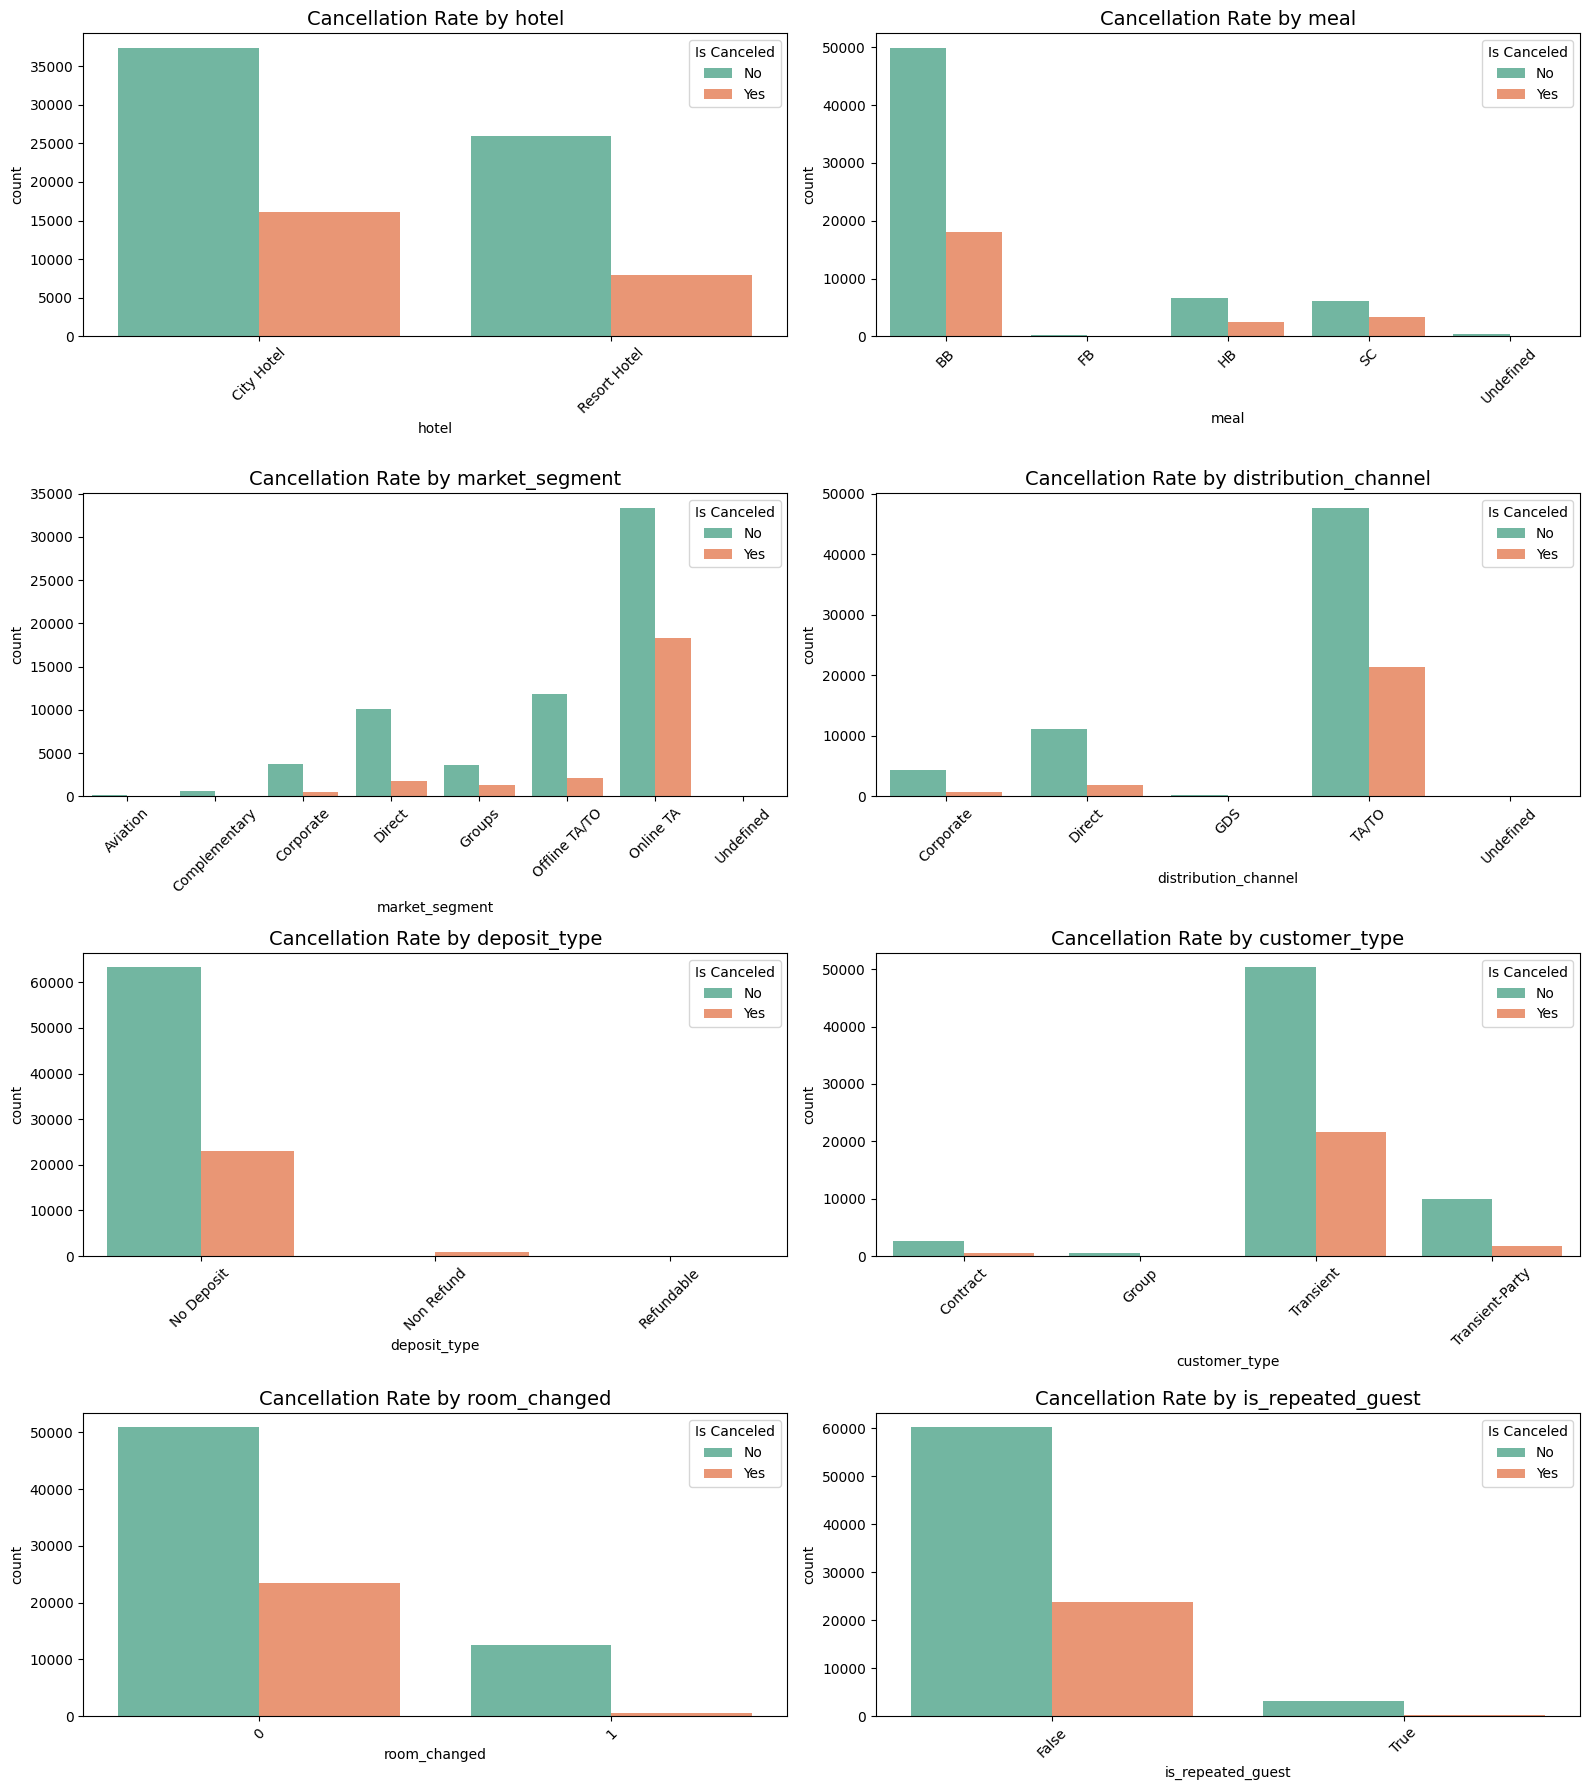

In [55]:
cat_cols_bivar = [
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'deposit_type', 'customer_type', 'room_changed', 'is_repeated_guest'
]
n_cols = 2
n_rows = (len(cat_cols_bivar) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cat_cols_bivar):
    sns.countplot(data=df, x=col, hue='is_canceled', palette="Set2", ax=axes[i])
    axes[i].set_title(f"Cancellation Rate by {col}", fontsize=14)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].legend(title="Is Canceled", labels=["No", "Yes"])
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [56]:
low_card_threshold = 10
rare_threshold = 0.01

cat_cols = df.select_dtypes(include='object').columns

low_card_cols = []
high_card_cols = []

for col in cat_cols:
    num_unique = df[col].nunique()
    if num_unique <= low_card_threshold:
        low_card_cols.append(col)
    else:
        high_card_cols.append(col)

df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

for col in high_card_cols:
    counts = df[col].value_counts(normalize=True)
    rare_labels = counts[counts < rare_threshold].index
    df[col] = df[col].replace(rare_labels, 'Other')

    freq = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq)

print("Encoding completed successfully!")


Encoding completed successfully!


In [57]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,total_guests,has_guests,has_special_requests,room_changed,waiting_list_flag,adr_per_person,cancellation_ratio,total_nights,stay_category_medium_stay,stay_category_short_stay
0,Resort Hotel,False,296.0,0.0,0.0,2.0,0,0.0,BB,PRT,...,2.0,1,0,0,0,0.0,0.0,0.0,False,True
1,Resort Hotel,False,296.0,0.0,0.0,2.0,0,0.0,BB,PRT,...,2.0,1,0,0,0,0.0,0.0,0.0,False,True
2,Resort Hotel,False,7.0,0.0,1.0,2.0,0,0.0,BB,GBR,...,2.0,1,0,1,0,37.5,0.0,1.0,False,True
3,Resort Hotel,False,13.0,0.0,1.0,2.0,0,0.0,BB,GBR,...,2.0,1,0,0,0,37.5,0.0,1.0,False,True
4,Resort Hotel,False,14.0,0.0,2.0,2.0,0,0.0,BB,GBR,...,2.0,1,1,0,0,49.0,0.0,2.0,False,True


In [60]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (69901, 38)
X_test shape: (17476, 38)
y_train shape: (69901,)
y_test shape: (17476,)
